<a href="https://www.kaggle.com/code/rinichristy/polynomial-regression-on-co2-emission?scriptVersionId=92436447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Polynomial Regression on Carbon dioxide emission of vehicles**

## **Table of Contents**

* [Data Exploration (EDA)](#EDA)
* [Model Development](#Model)
* [Model Evaluation](#Evaluation)

## **Importing the required packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Dataset Information**
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load the Fuel Consumption dataset**

In [2]:
df = pd.read_csv("../input/2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Exploration**<a name="EDA"></a>

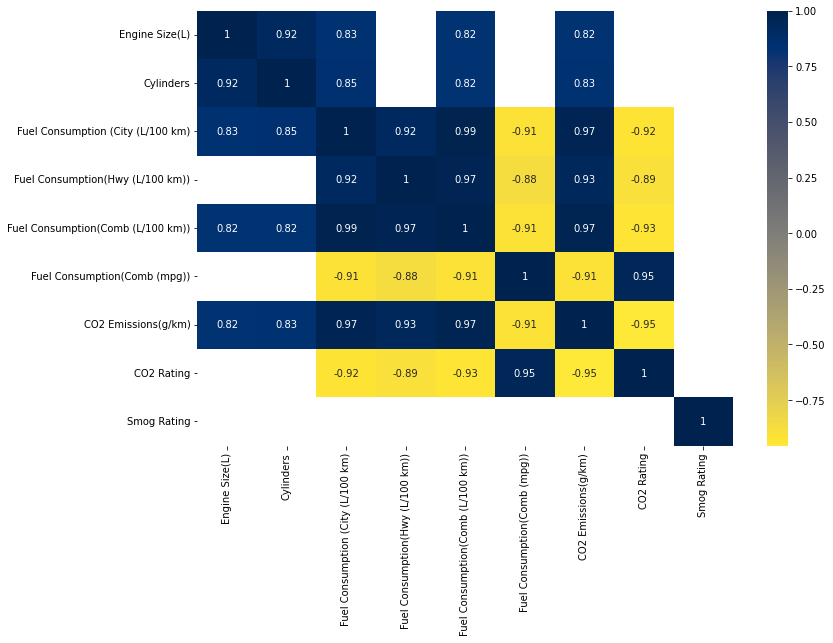

In [3]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

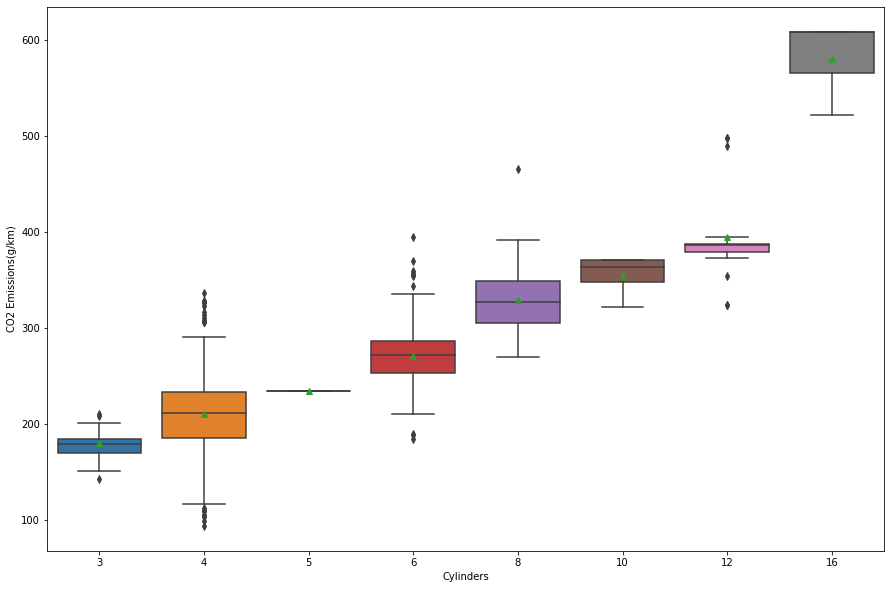

In [4]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True);

**P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

In [5]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is 0.833240570133112  with a P-value of P = 3.6276159873873733e-245
The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is 0.8241875694085823  with a P-value of P = 2.4338710526790506e-235
The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8217180823738502  with a P-value of P = 9.314329241215394e-233
The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.8186935336201379  with a P-value of P = 1.198288656221755e-229


#### **ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable. 

ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.  A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value.
If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [6]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
from scipy import stats
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 4],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 5],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 10],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 12],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=321.2813100475542, pvalue=4.589761627416592e-244)

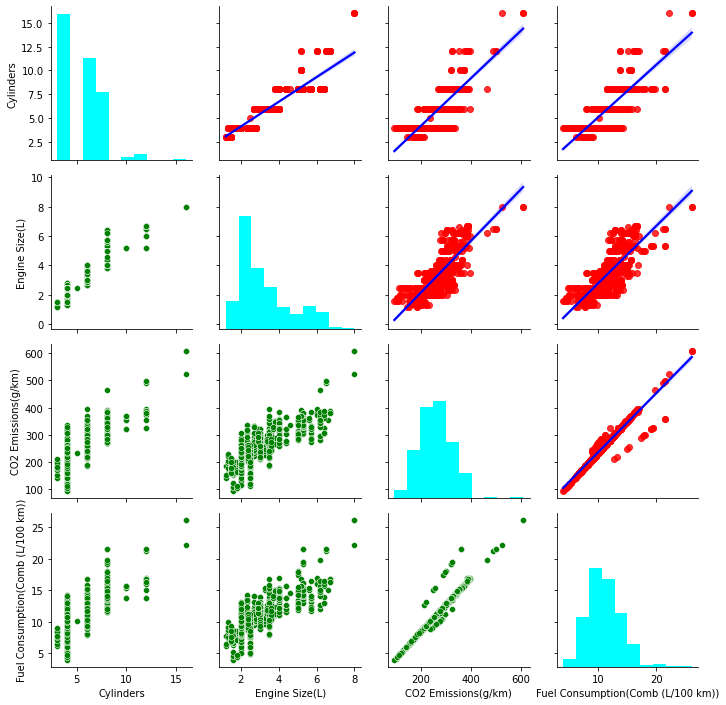

In [7]:
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']])
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist, color ='cyan');

## **Model Development: Polynomial Linear Regression**<a name="Model"></a>

In Polynomial regression, although  the trend of data looks curvy. the method is similar to a combination of simple linear regression and multiple linear regression. Similar to linear regression means, it is dependent on single feature. However, when it says it behaves as multiple linear regression, it is because that single feature is converted to its quadratic, cubic, quartic and so on, and it can go on and on to infinite degrees and then it is treated as MLR.  In essence, the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$$y = a + \theta_1  x + \theta_2 x^2 + \theta_3 x^3 ........\theta_\infty x^\infty $$

To fit the data on this equation with x values, such as __Engine Size__, create a few additional features: 1, $x$, and $x^2$, $x^3$...and so on.

__PloynomialFeatures()__ function in Scikit-learn library, creates a new feature sets from the original feature set. A matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. If the degree of the polynomial is selected to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

### **Building model using train and test datasets created after Train/Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 
One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that he outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Split the entire dataset into 80% for training, and the 20% for testing. Create a mask to select random rows using np.random.rand() function:

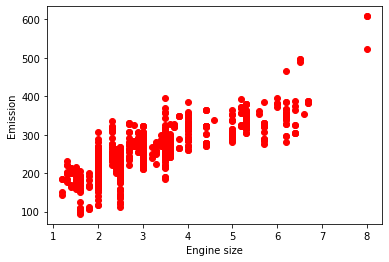

In [8]:
df_model = df[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)']]
df_model.columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
plt.scatter(df_model.ENGINESIZE, df_model.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### **Polynomial degree = 2**

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.  ,  4.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

**poly.fit_transform** takes the x values, and produces an output with a list of the x values raised from power of 0 to power of 2 (with the degree of polynomial set to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

For example,

$
\begin{bmatrix}
    2.4\\
    3.5\\
    2.0\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 3.5 & 12.25]\\
    [ 1 & 2.0 & 4.00]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

This looks like feature sets for multiple linear regression analysis. Polynomial regression is a special case of linear regression. This polynomial regression is considered to be a special case of traditional multiple linear regression. So, the same mechanism as linear regression can be used to solve such a problems and hence __LinearRegression()__ function is employed to solve it:

In [10]:
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression model is: ', plm.coef_)

The value of the intercept of polynomial linear regression model is:  [104.91877546]
The Coefficients of polynomial linear regression model is:  [[ 0.         58.81712944 -2.76972733]]


 __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

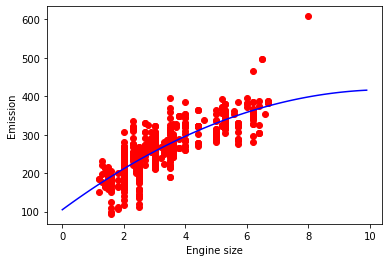

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'blue' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model Evaluation<a name="Evaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>
<ul>
    <li> Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)] </li>
    __explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.
</ul>

### **Evaluation Metrics**

In [12]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 2 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 2 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 2 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 2 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 2 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is: 29.38042804198369
Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is: 1658.8497647454794
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is: 40.728979421849985
Variance score of Polynomial Linear regression degree 2 is: 0.69
Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is: 0.6748098064943246
Residual sum of squares of Polynomial Linear regression degree 2 is: 1658.85
R2 of Polynomial Linear regression: 0.6743291229628516
R2 rounded of Polynomial Linear regression degree 2 is: 0.67
Adjusted_r2 of Polynomial Linear regression degree 2 is:  0.673
Accuracy of Polynomial Linear regression degree 2 is: 0.6743291229628516


### **Summary statistics of Train set**

In [13]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     817.4
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          3.21e-189
Time:                        08:28:44   Log-Likelihood:                -3751.7
No. Observations:                 754   AIC:                             7509.
Df Residuals:                     751   BIC:                             7523.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9188      8.687     12.077      0.0

#### **Polynomial degree = 3**

The value of the intercept of polynomial linear regression degree 3 model is:  [44.41380267]
The Coefficients of polynomial linear regression degree 3 model is:  [[  0.         115.46709846 -18.38117902   1.29439482]]


Text(0, 0.5, 'Emission')

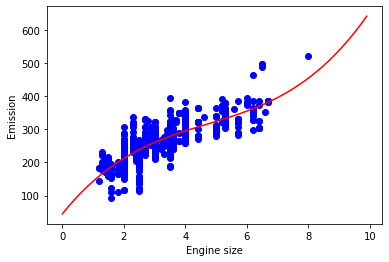

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression degree 3 model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression degree 3 model is: ', plm.coef_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2) + plm.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 3 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 3 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 3 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 3 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 3 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 3 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression degree 3 is:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 3 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 3 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 3 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 3 is: 26.680377247289496
Mean Squared Error(MSE) of Polynomial Linear regression degree 3 is: 1395.266932437331
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 3 is: 37.35327204459244
Variance score of Polynomial Linear regression degree 3 is: 0.69
Explained Variance Score (EVS) of Polynomial Linear regression degree 3 is: 0.7225289015383494
Residual sum of squares of Polynomial Linear regression degree 3 is: 1395.27
R2 of Polynomial Linear regression degree 3 is: 0.7193713634377874
R2 rounded of Polynomial Linear regression degree 3 is: 0.72
Adjusted_r2 of Polynomial Linear regression degree 3 is:  0.718
Accuracy of Polynomial Linear regression degree 3 is: 0.7193713634377874


In [16]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     562.6
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          4.46e-192
Time:                        08:28:44   Log-Likelihood:                -3778.0
No. Observations:                 760   AIC:                             7564.
Df Residuals:                     756   BIC:                             7583.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4138     19.547      2.272      0.0

**Residual Plot**

A good way to visualize the variance of the data is to use a residual plot. A good way to visualize the variance of the data is to use a residual plot. 

**Residuals**
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

Pay attention to the spread of the residuals when looking at a residual plot:
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

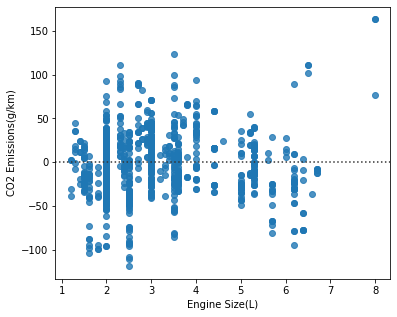

In [17]:
plt.figure(figsize=((6,5)))
sns.residplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df)
plt.show();

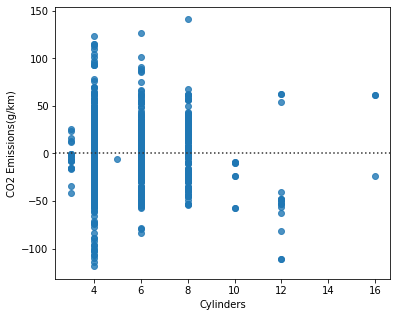

In [18]:
plt.figure(figsize=((6,5)))
sns.residplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = df)
plt.show();

The evaluation metrics and residual plots show that linear model is better than polynomial model for this data. 

### **Fuel Consumption Vs Emission**

The value of the intercept of polynomial linear regression model is:  [-21.28731206]
The Coefficients of polynomial linear regression model is:  [[ 0.         28.62322836 -0.28473911]]


Text(0, 0.5, 'Emission')

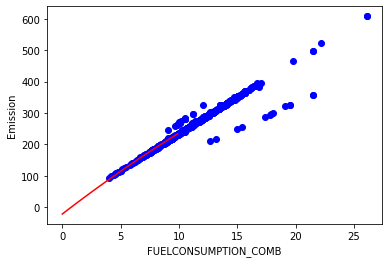

In [19]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression model is: ', plm.coef_)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [20]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 2 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 2 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression degree 2 is:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 2 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 2 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 2 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is: 5.082861303523067
Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is: 124.94632379596088
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is: 11.177939156926955
Variance score of Polynomial Linear regression degree 2 is: 0.95
Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is: 0.9660833450131274
Residual sum of squares of Polynomial Linear regression degree 2 is: 124.95
R2 of Polynomial Linear regression degree 2 is: 0.9651253670933219
R2 rounded of Polynomial Linear regression degree 2 is: 0.97
Adjusted_r2 of Polynomial Linear regression degree 2 is:  0.965
Accuracy of Polynomial Linear regression degree 2 is: 0.9651253670933219


In [21]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     6617.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:28:46   Log-Likelihood:                -3170.3
No. Observations:                 765   AIC:                             6347.
Df Residuals:                     762   BIC:                             6361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.2873      5.330     -3.994      0.0